<a href="https://colab.research.google.com/github/cjsdudwls1/Aflatoxin_analysis/blob/main/4_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/df_enhanced.pkl.gz'
df = pd.read_pickle(path, compression='gzip')

Mounted at /content/drive


In [ ]:
df['INSPCT_PURPS_NAME'].value_counts().reset_index().rename(columns={'index': 'INSPCT_PURPS_NAME', 'count': '개수'})

,INSPCT_PURPS_NAME,개수
0,자가품질위탁검사,129135
1,수거검사,25316
2,기타,4148
3,제조.수입품목허가(신고)용검사,99


In [ ]:
df

,INSPCT_PURPS_NAME,PRDLST_NM,사용주소,x_coord,y_coord,tmprt_150_59,tmprt_150Top_59,tmprt_150Lwet_59,hd_150_59,arvlty_300_59,...,일조_58,일조_59,JDGMNT_WORD_NAME,결과,결과값,1차 식품 분류,JDGMNT_WORD_NAME_encoded,독소 생성 최적 온도 일수,저습도 일수,연속 무강수 일수
0,자가품질위탁검사,과자,제조공장,127.169855,37.436716,12.1,18.2,6.2,76.2,0.4,...,9.9,7.7,적합,불검출,0,"과자류, 빵류 또는 떡류",0,0,2,2.0
1,자가품질위탁검사,과자,제조공장,127.169855,37.436716,12.1,18.2,6.2,76.2,0.4,...,9.9,7.7,적합,불검출,0,"과자류, 빵류 또는 떡류",0,0,2,2.0
2,자가품질위탁검사,과자,검사소,127.100161,37.279721,12.7,20.0,6.3,75.3,0.6,...,9.2,8.6,적합,불검출,0,"과자류, 빵류 또는 떡류",0,0,4,1.0
3,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,126.770236,37.167154,12.5,20.8,5.6,80.8,0.4,...,8.5,9.3,적합,불검출,0,건강기능식품(제품),0,0,0,7.0
4,자가품질위탁검사,보스웰리아추출물등 복합물(Flexir)(제2021-9호),제조공장,126.770236,37.167154,12.5,20.8,5.6,80.8,0.4,...,8.5,9.3,적합,불검출,0,건강기능식품(제품),0,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169957,기타,기타기준규격외,제조공장,128.973543,36.045170,11.2,16.4,7.0,54.2,2.0,...,9.3,9.2,적합,불검출,0,기타식품류,0,0,7,7.0
169958,기타,기타기준규격외,제조공장,128.973543,36.045170,11.2,16.4,7.0,54.2,2.0,...,9.3,9.2,적합,불검출,0,기타식품류,0,0,7,7.0
169959,기타,기타기준규격외,제조공장,128.973543,36.045170,11.2,16.4,7.0,54.2,2.0,...,9.3,9.2,적합,불검출,0,기타식품류,0,0,7,7.0
169960,기타,기타기준규격외,제조공장,127.046083,36.219914,10.4,19.7,1.7,72.0,0.2,...,0.0,8.2,적합,불검출,0,기타식품류,0,0,0,6.0


In [ ]:
print(df['JDGMNT_WORD_NAME_encoded'].value_counts())
print(df['JDGMNT_WORD_NAME_encoded'].value_counts(normalize=True))

JDGMNT_WORD_NAME_encoded
0    157889
1       809
Name: count, dtype: int64
JDGMNT_WORD_NAME_encoded
0    0.994902
1    0.005098
Name: proportion, dtype: float64


In [ ]:
df.shape

(158698, 613)

In [ ]:
df.columns

Index(['INSPCT_PURPS_NAME', 'PRDLST_NM', '사용주소', 'x_coord', 'y_coord',
       'tmprt_150_59', 'tmprt_150Top_59', 'tmprt_150Lwet_59', 'hd_150_59',
       'arvlty_300_59',
       ...
       '일조_58', '일조_59', 'JDGMNT_WORD_NAME', '결과', '결과값', '1차 식품 분류',
       'JDGMNT_WORD_NAME_encoded', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수'],
      dtype='object', length=613)

In [ ]:
import pandas as pd
import numpy as np

# 1. 2열: 'Unnamed: 2' 칼럼의 총 개수 계산 (Value Counts)
# groupby().size()는 'Unnamed: 2'를 인덱스로 하는 총 개수 Series를 반환합니다.
total_counts = df.groupby('1차 식품 분류').size().to_frame(name='총 개수')

# 2. 3, 4열: 'JDGMNT_WORD_NAME_encoded' 칼럼의 유니크 값 별 카운트
# pd.crosstab()은 두 칼럼 간의 교차표를 생성합니다.
# 'Unnamed: 2'가 인덱스, 'JDGMNT_WORD_NAME_encoded'의 유니크 값(0, 1)이 칼럼이 됩니다.
cross_table = pd.crosstab(df['1차 식품 분류'], df['JDGMNT_WORD_NAME_encoded'])

# 3. 두 데이터프레임(total_counts, cross_table)을 합칩니다.
# 두 데이터프레임 모두 'Unnamed: 2'를 인덱스로 가지고 있으므로 axis=1로 옆으로 붙입니다.
result_df = pd.concat([total_counts, cross_table], axis=1)

# 4. 1열: 'Unnamed: 2' (인덱스)를 칼럼으로 변환
# reset_index()를 사용하여 인덱스를 첫 번째 칼럼으로 이동시킵니다.
result_df = result_df.reset_index()

In [ ]:
result_df

,1차 식품 분류,총 개수,0,1
0,건강기능식품(제품),2693,2678,15
1,곡류,1877,1851,26
2,과일류,537,536,1
3,"과자류, 빵류 또는 떡류",54684,54267,417
4,기타식품류,1344,1342,2
5,농산가공식품류,79232,79067,165
6,두류,1669,1663,6
7,식용유지류,21,19,2
8,식육가공품류 및 포장육,472,471,1
9,영양성분(건강기능식품 공전 수록),4,2,2


In [ ]:
value_counts = df['1차 식품 분류'].value_counts()
low_frequency_values = value_counts[value_counts < 100].index
print("Values being replaced with '기타' (frequency < 100):", low_frequency_values.tolist())
df['1차 식품 분류'] = df['1차 식품 분류'].replace(low_frequency_values, '기타')

Values being replaced with '기타' (frequency < 100): ['잼류', '식용유지류', '영양성분(건강기능식품 공전 수록)']


In [ ]:
df['1차 식품 분류'].value_counts().reset_index().rename(columns={'index': '1차 식품 분류', 'count': '개수'})

,1차 식품 분류,개수
0,농산가공식품류,79232
1,"과자류, 빵류 또는 떡류",54684
2,장류,9493
3,조미식품,3739
4,건강기능식품(제품),2693
5,곡류,1877
6,두류,1669
7,기타식품류,1344
8,음료류,842
9,채소류,790


In [ ]:
df.columns

Index(['INSPCT_PURPS_NAME', 'PRDLST_NM', '사용주소', 'x_coord', 'y_coord',
       'tmprt_150_59', 'tmprt_150Top_59', 'tmprt_150Lwet_59', 'hd_150_59',
       'arvlty_300_59',
       ...
       '일조_58', '일조_59', 'JDGMNT_WORD_NAME', '결과', '결과값', '1차 식품 분류',
       'JDGMNT_WORD_NAME_encoded', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수'],
      dtype='object', length=613)

In [ ]:
non_timeseries_cols = ['INSPCT_PURPS_NAME', 'PRDLST_NM', '사용주소', 'x_coord', 'y_coord','JDGMNT_WORD_NAME', '결과', '결과값', '1차 식품 분류',
       'JDGMNT_WORD_NAME_encoded', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수'
    ]

In [ ]:
# Identify timeseries patterns
all_cols = df.columns.tolist()
timeseries_patterns = []
for col in all_cols:
    # Check if the column is not in non_timeseries_cols and matches a pattern like 'abc_XX'
    if col not in non_timeseries_cols and '_' in col and col.split('_')[-1].isdigit():
        pattern = '_'.join(col.split('_')[:-1])
        if pattern not in timeseries_patterns:
            timeseries_patterns.append(pattern)

print("Identified timeseries patterns:", timeseries_patterns)

Identified timeseries patterns: ['tmprt_150', 'tmprt_150Top', 'tmprt_150Lwet', 'hd_150', 'arvlty_300', 'arvlty_300Top', 'afp', 'solrad_Qy', 'soil_Mitr_10', '일조']


In [ ]:
timeseries_patterns

['tmprt_150',
 'tmprt_150Top',
 'tmprt_150Lwet',
 'hd_150',
 'arvlty_300',
 'arvlty_300Top',
 'afp',
 'solrad_Qy',
 'soil_Mitr_10',
 '일조']

## 시계열 timesteps를 50일로 변환

In [ ]:
import pandas as pd
import numpy as np

def convert_60days_to_50days(df):
    new_data = {}

    # 1. 비시계열 컬럼은 그대로 복사
    for col in non_timeseries_cols:
        if col in df.columns:
            new_data[col] = df[col].values

    # 2. 시계열 컬럼 변환 (60일 -> 50일)
    for pattern in timeseries_patterns:
        # 해당 패턴의 모든 컬럼 찾기 (00~59)
        pattern_cols = [col for col in df.columns if col.startswith(f'{pattern}_')]

        if len(pattern_cols) > 0:
            # 60개의 시계열 데이터를 추출
            timeseries_data = df[pattern_cols].values  # shape: (n_samples, 60)

            # 60일을 50일로 리샘플링 (균등하게 10개 제거)
            # 방법: 60개 중 10개를 균등하게 건너뛰기
            indices_to_keep = np.round(np.linspace(0, 59, 50)).astype(int)
            resampled_data = timeseries_data[:, indices_to_keep]

            # 새로운 컬럼명으로 저장 (00~49)
            for i in range(50):
                new_col_name = f'{pattern}_{i:02d}'
                new_data[new_col_name] = resampled_data[:, i]

    # 새로운 데이터프레임 생성
    df_new = pd.DataFrame(new_data)

    # 컬럼 순서 정렬: 시계열 컬럼들을 먼저, 그 다음 비시계열 컬럼들
    timeseries_cols = [col for col in df_new.columns if any(col.startswith(f'{p}_') for p in timeseries_patterns)]
    timeseries_cols_sorted = sorted(timeseries_cols)
    other_cols = [col for col in df_new.columns if col not in timeseries_cols]

    df_new = df_new[timeseries_cols_sorted + other_cols]

    return df_new


# 사용 예시
df_50days = convert_60days_to_50days(df)
df = df_50days.copy()
print(f"변환 후 shape: {df_50days.shape}, 시계열컬럼수: {(df_50days.shape[1] - 8)/len(timeseries_patterns)}")
print(f"변환 후 columns: {df_50days.columns.tolist()}")

변환 후 shape: (158698, 513), 시계열컬럼수: 50.5
변환 후 columns: ['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06', 'afp_07', 'afp_08', 'afp_09', 'afp_10', 'afp_11', 'afp_12', 'afp_13', 'afp_14', 'afp_15', 'afp_16', 'afp_17', 'afp_18', 'afp_19', 'afp_20', 'afp_21', 'afp_22', 'afp_23', 'afp_24', 'afp_25', 'afp_26', 'afp_27', 'afp_28', 'afp_29', 'afp_30', 'afp_31', 'afp_32', 'afp_33', 'afp_34', 'afp_35', 'afp_36', 'afp_37', 'afp_38', 'afp_39', 'afp_40', 'afp_41', 'afp_42', 'afp_43', 'afp_44', 'afp_45', 'afp_46', 'afp_47', 'afp_48', 'afp_49', 'arvlty_300Top_00', 'arvlty_300Top_01', 'arvlty_300Top_02', 'arvlty_300Top_03', 'arvlty_300Top_04', 'arvlty_300Top_05', 'arvlty_300Top_06', 'arvlty_300Top_07', 'arvlty_300Top_08', 'arvlty_300Top_09', 'arvlty_300Top_10', 'arvlty_300Top_11', 'arvlty_300Top_12', 'arvlty_300Top_13', 'arvlty_300Top_14', 'arvlty_300Top_15', 'arvlty_300Top_16', 'arvlty_300Top_17', 'arvlty_300Top_18', 'arvlty_300Top_19', 'arvlty_300Top_20', 'arvlty_300Top_21', 'arvl

In [ ]:
# Target mean

df = df.drop(columns=['사용주소', 'PRDLST_NM', 'JDGMNT_WORD_NAME', 'x_coord', 'y_coord'])
## traget mean ###
df['교차_조합'] = df['1차 식품 분류'] + '_' + df['INSPCT_PURPS_NAME']
cross_mean = df.groupby('교차_조합')['JDGMNT_WORD_NAME_encoded'].mean()
df['Target_Mean'] = df['교차_조합'].map(cross_mean)
# print("\n--- 실제 계산된 교차 조합별 Target Mean 값 ---")
# print(cross_mean)
df.drop(columns=['교차_조합'], inplace=True)

In [ ]:
df.columns

Index(['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06',
       'afp_07', 'afp_08', 'afp_09',
       ...
       '일조_49', 'INSPCT_PURPS_NAME', '결과', '결과값', '1차 식품 분류',
       'JDGMNT_WORD_NAME_encoded', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수',
       'Target_Mean'],
      dtype='object', length=509)

In [ ]:
X_ts = df.iloc[:, : -9]
print(X_ts.shape)
X_lm = df[['INSPCT_PURPS_NAME', '1차 식품 분류', 'Target_Mean', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수']]
print(X_lm.shape)

(158698, 500)
(158698, 6)


In [ ]:
print(df[['INSPCT_PURPS_NAME', '1차 식품 분류', 'Target_Mean', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수']].dtypes)

INSPCT_PURPS_NAME     object
1차 식품 분류              object
Target_Mean          float64
독소 생성 최적 온도 일수         int64
저습도 일수                 int64
연속 무강수 일수            float64
dtype: object


## 1. 실험 데이터 1

In [ ]:
y = df['JDGMNT_WORD_NAME_encoded']
y.value_counts(normalize=True)

,proportion
JDGMNT_WORD_NAME_encoded,
0,0.994902
1,0.005098


<>:581: SyntaxWarning: invalid escape sequence '\('
<>:581: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-3246888208.py:581: SyntaxWarning: invalid escape sequence '\('
  bp = ax1.boxplot(data_to_plot, labels=[f'low {percentile}%\(safe))', f'top {percentile}%\n(risk)'],


[✅] SMOTE 출력값에 NaN/inf 없음

[최종 체크]
X_ts_train_res NaN: 0, Inf: 0
X_lm_train_res NaN: 0, Inf: 0

Training data shapes (After SMOTE):
  X_ts_train: (252622, 50, 10)
  X_tab_train: (252622, 24)
  y_train: (252622,), 클래스 1 비율: 0.5000

Validation data shapes (No SMOTE):
  X_ts_val: (31740, 50, 10)
  X_tab_val: (31740, 24)
  y_val: (31740,), 클래스 1 비율: 0.0051

방법 1: Weighted Binary Crossentropy

[학습 전 데이터 검증]
X_ts_train: NaN=0, Inf=0
X_tab_train: NaN=0, Inf=0
y_train: NaN=0, Inf=0

[클래스 불균형 분석]
  클래스 0: 126311개
  클래스 1: 126311개
  불균형 비율: 1:1.0
  계산된 pos_weight: 1.00

[✅] 손실 함수: Weighted BCE (pos_weight=1.00)
Epoch 1/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.6317 - auc: 0.6781 - f1_score: 0.6446 - loss: 1.1257 - precision: 0.6255 - recall: 0.6649 - val_accuracy: 0.6053 - val_auc: 0.7328 - val_f1_score: 0.0191 - val_loss: 1.1328 - val_precision: 0.0097 - val_recall: 0.7531 - learning_rate: 1.0000e-04
Epoch 2/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8072 - au

992/992 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step

[Classification Report]
              precision    recall  f1-score   support

           0     0.9984    0.9875    0.9929     31578
           1     0.2209    0.6914    0.3348       162

    accuracy                         0.9860     31740
   macro avg     0.6097    0.8394    0.6639     31740
weighted avg     0.9944    0.9860    0.9896     31740

ROC-AUC: 0.8332855386896174


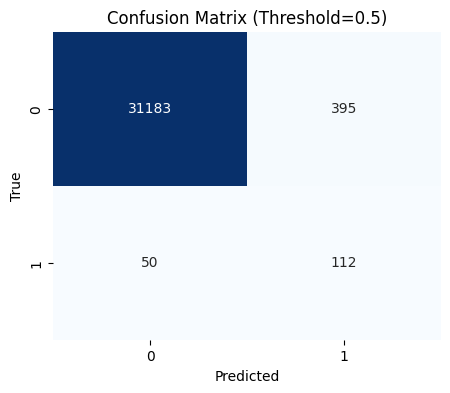

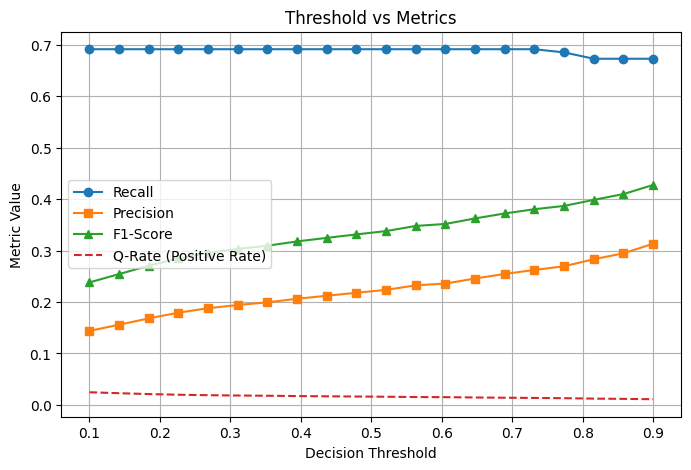

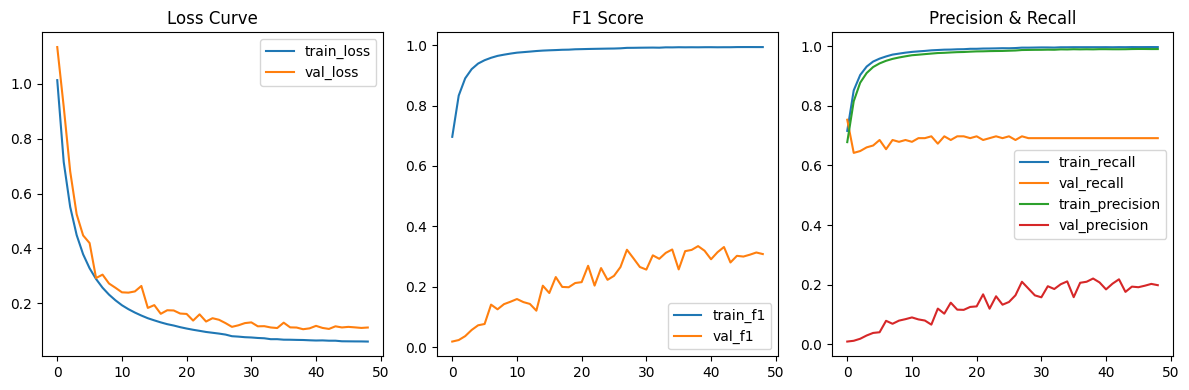


📊 예측 확률 기반 특성 분포 분석 (상위/하위 15%)

[그룹 정보]
  하위 15% (안전 그룹): 확률 ≤ 0.0000, 샘플 수: 4761개
  상위 15% (위험 그룹): 확률 ≥ 0.0003, 샘플 수: 4763개

──────────────────────────────────────────────────────────────────────
📌 특성: 독소 생성 최적 온도 일수
──────────────────────────────────────────────────────────────────────

[기술통계량]
지표              하위 15% (안전)          상위 15% (위험)          차이             
----------------------------------------------------------------------
평균              1.2598               0.8560               -0.4038        
중앙값             0.0000               0.0000               0.0000         
표준편차            2.3972               2.0007               -0.3965        
25% 분위수         0.0000               0.0000               0.0000         
75% 분위수         1.0000               0.0000               -1.0000        

[통계적 검정]
  1) Independent t-test (평균 차이 검정)
     - t-statistic: 8.9255
     - p-value: 0.000000
     - 유의성 (α=0.05): ✅ 유의미한 차이 있음

  2) Mann-Whitney U test (비모수 검정)
     - U-statistic

/tmp/ipython-input-3246888208.py:581: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=[f'low {percentile}%\(safe))', f'top {percentile}%\n(risk)'],
/tmp/ipython-input-3246888208.py:581: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=[f'low {percentile}%\(safe))', f'top {percentile}%\n(risk)'],
/tmp/ipython-input-3246888208.py:581: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(data_to_plot, labels=[f'low {percentile}%\(safe))', f'top {percentile}%\n(risk)'],
/tmp/ipython-input-3246888208.py:613: UserWarning: Glyph 44050 (\N{HANGUL

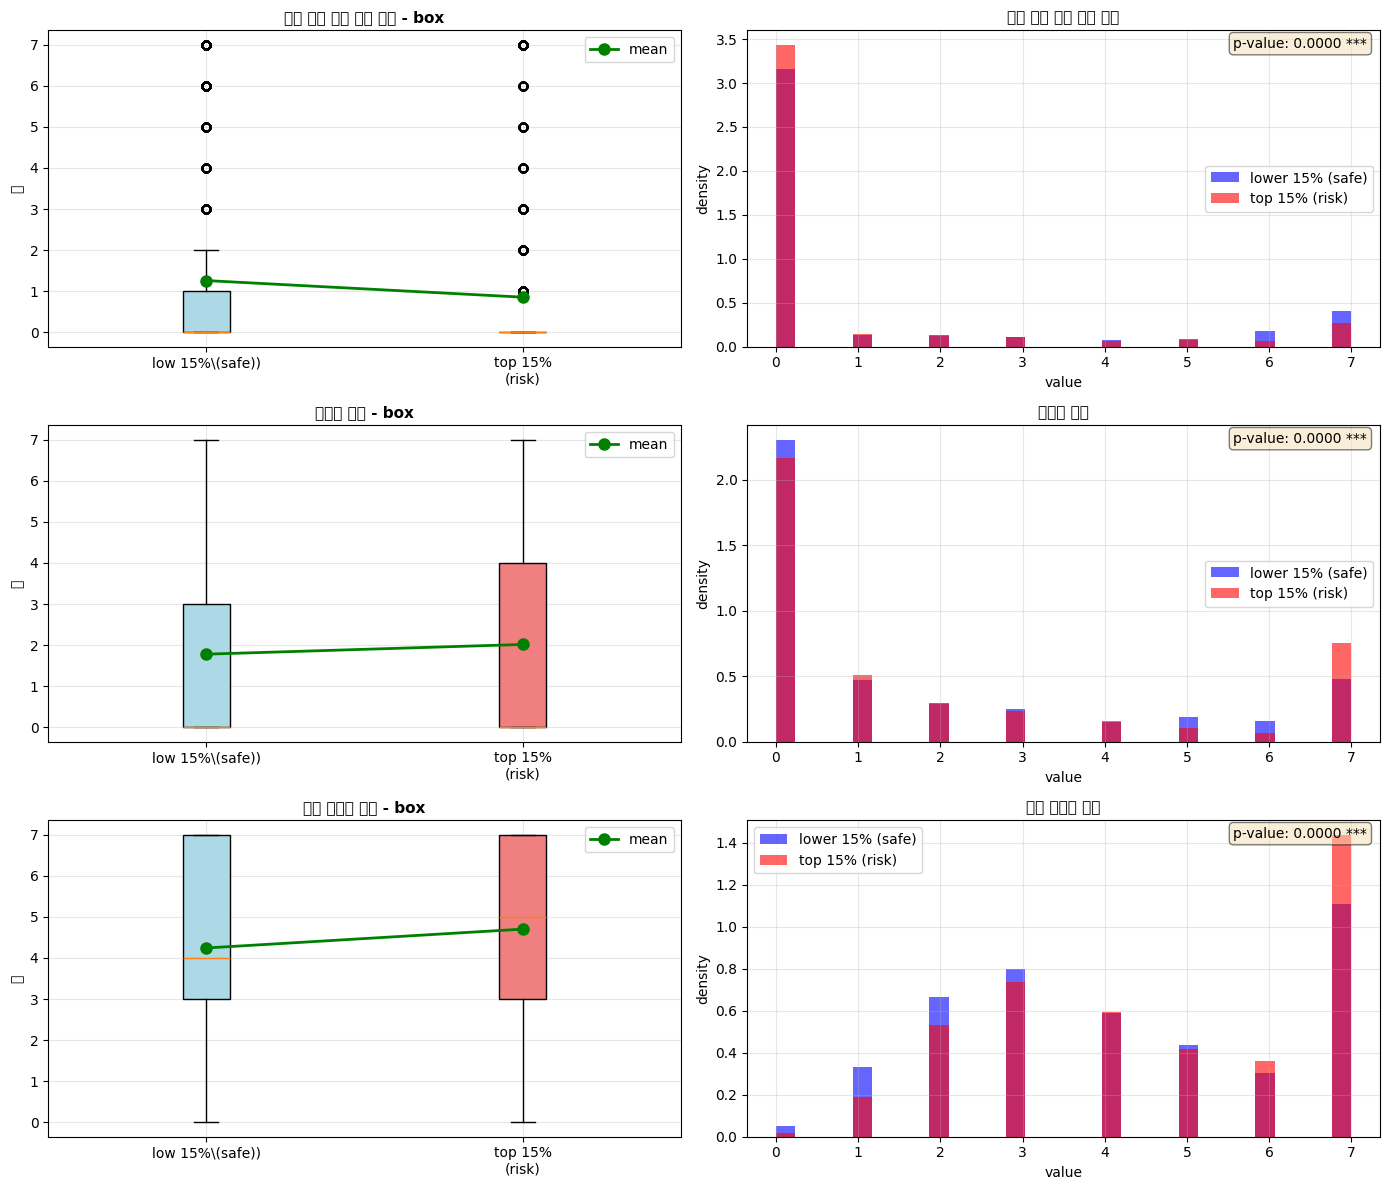


📋 통계 검정 요약표

            특성      평균차이    t-test p값    U-test p값  Cohen's d 유의성
독소 생성 최적 온도 일수 -0.403846 5.259214e-19 3.771590e-15  -0.182916   ✅
        저습도 일수  0.236708 8.323181e-06 4.536430e-05   0.091384   ✅
     연속 무강수 일수  0.459062 1.428787e-27 8.974975e-27   0.223681   ✅

💡 해석 가이드

    1. p-value < 0.05: 통계적으로 유의미한 차이 (95% 신뢰수준)
    2. Cohen's d 해석:
       - |d| < 0.2: 효과 크기 매우 작음
       - 0.2 ≤ |d| < 0.5: 효과 크기 작음
       - 0.5 ≤ |d| < 0.8: 효과 크기 중간
       - |d| ≥ 0.8: 효과 크기 큼
    3. 양수 평균차이: 상위 15%(위험 그룹)가 하위 15%(안전 그룹)보다 큼
    4. 음수 평균차이: 상위 15%(위험 그룹)가 하위 15%(안전 그룹)보다 작음
    


In [ ]:
import numpy as np
import pandas as pd
import random
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt
import seaborn as sns

# ==================================================
#  재현성을 위한 시드 고정 (필수)
# ==================================================
def set_seeds(seed=42):
    """
    모든 주요 라이브러리의 시드를 고정하여 재현성을 보장합니다.
    """
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    # GPU 사용 시 결정론적 연산을 위한 추가 설정 (성능 저하가 있을 수 있음)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 42
set_seeds(SEED)

# ===============================
#  Attention Layer (Gradient Clipping 추가)
# ===============================
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[-1],),
                                 initializer='zeros',
                                 trainable=True)
        self.u = self.add_weight(name='att_u',
                                 shape=(input_shape[-1],),
                                 initializer='glorot_uniform',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # v = tanh(H W + b)
        v = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        # vu = v u
        vu = tf.tensordot(v, self.u, axes=1)
        # alphas = softmax(vu) with numerical stability
        vu = tf.clip_by_value(vu, -10, 10)  # 수치 안정성 향상
        alphas = tf.nn.softmax(vu, axis=1)
        # output = sum(H * alphas)
        output = tf.reduce_sum(inputs * tf.expand_dims(alphas, -1), axis=1)
        return output


# ===============================
#  개선된 Focal Loss
# ===============================
def focal_loss(alpha=0.75, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        # 더 안전한 epsilon 값 사용
        eps = 1e-7
        y_pred = tf.clip_by_value(y_pred, eps, 1. - eps)

        # Positive loss term (1)
        loss_pos = -alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
        # Negative loss term (0)
        loss_neg = -(1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)

        # Combine
        loss = tf.where(tf.equal(y_true, 1), loss_pos, loss_neg)

        # NaN 체크 및 처리
        loss = tf.where(tf.math.is_nan(loss), tf.zeros_like(loss), loss)
        loss = tf.where(tf.math.is_inf(loss), tf.zeros_like(loss), loss)

        return tf.reduce_mean(loss)
    return focal_loss_fixed


# ===============================
#  방법 1: Binary Crossentropy with Positive Weight
# ===============================
def weighted_binary_crossentropy(pos_weight=50.0):
    """
    극단적인 불균형에 더 안정적인 손실 함수
    pos_weight: 양성 클래스의 가중치 (보통 neg_count / pos_count)
    """
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        eps = 1e-7
        y_pred = tf.clip_by_value(y_pred, eps, 1. - eps)

        # Weighted BCE
        bce = -(pos_weight * y_true * tf.math.log(y_pred) +
                (1 - y_true) * tf.math.log(1 - y_pred))

        return tf.reduce_mean(bce)
    return loss


# ===============================
#  방법 2: 자동으로 pos_weight 계산하는 함수
# ===============================
def calculate_pos_weight(y_train):
    """
    훈련 데이터로부터 자동으로 pos_weight 계산
    """
    neg_count = (y_train == 0).sum()
    pos_count = (y_train == 1).sum()
    pos_weight = neg_count / pos_count
    print(f"\n[클래스 불균형 분석]")
    print(f"  클래스 0: {neg_count}개")
    print(f"  클래스 1: {pos_count}개")
    print(f"  불균형 비율: 1:{pos_weight:.1f}")
    print(f"  계산된 pos_weight: {pos_weight:.2f}")
    return float(pos_weight)


# ==================================================
#  F1 Score Keras Metric
# ==================================================
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', threshold=0.5, **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision(thresholds=threshold)
        self.recall = tf.keras.metrics.Recall(thresholds=threshold)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


# ===============================
#  Data preprocessing (개선)
# ===============================
def preprocess(X_ts, X_lm, y, n_features=9, timesteps=50, random_state=42):
    """
    개선된 전처리 파이프라인
    """
    # X_ts를 NumPy 배열로 변환
    if isinstance(X_ts, pd.DataFrame):
        X_ts = X_ts.values

    # 1️⃣ 시계열 데이터 reshape
    X_ts = X_ts.reshape(-1, timesteps, n_features)

    # 2️⃣ 시계열 표준화 (더 안전한 방식)
    scaler = StandardScaler()
    X_ts_2d = X_ts.reshape(-1, n_features)
    X_ts_scaled = scaler.fit_transform(X_ts_2d)

    # NaN/Inf 체크
    if np.isnan(X_ts_scaled).any() or np.isinf(X_ts_scaled).any():
        print("[🚨 경고] 시계열 스케일링 후 NaN/Inf 발견!")
        X_ts_scaled = np.nan_to_num(X_ts_scaled, nan=0.0, posinf=0.0, neginf=0.0)

    X_ts_scaled = X_ts_scaled.reshape(-1, timesteps, n_features)

    # 3️⃣ 일반 데이터 전처리
    cat_cols = ['INSPCT_PURPS_NAME', '1차 식품 분류']
    num_cols = ['Target_Mean', '독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수']

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_cat = encoder.fit_transform(X_lm[cat_cols])

    num_scaler = StandardScaler()
    X_num_scaled = num_scaler.fit_transform(X_lm[num_cols])

    # NaN/Inf 체크
    if np.isnan(X_num_scaled).any() or np.isinf(X_num_scaled).any():
        print("[🚨 경고] 숫자형 데이터 스케일링 후 NaN/Inf 발견!")
        X_num_scaled = np.nan_to_num(X_num_scaled, nan=0.0, posinf=0.0, neginf=0.0)

    X_lm_proc = np.hstack([X_cat, X_num_scaled])

    # 4️⃣ 데이터 분리
    X_ts_train, X_ts_test, X_lm_train, X_lm_test, y_train, y_test = train_test_split(
        X_ts_scaled, X_lm_proc, y, test_size=0.2, stratify=y, random_state=random_state
    )

    # 5️⃣ SMOTE 적용
    X_ts_train_flat = X_ts_train.reshape(X_ts_train.shape[0], -1)
    X_train_combined = np.concatenate([X_ts_train_flat, X_lm_train], axis=1)

    sm = SMOTE(random_state=random_state, k_neighbors=5)
    X_resampled, y_train_res = sm.fit_resample(X_train_combined, y_train)

    # SMOTE 후 NaN/Inf 체크
    if np.isnan(X_resampled).any():
        print(f"[🚨 경고] SMOTE 후 NaN 발견: {np.isnan(X_resampled).sum()}개")
        X_resampled = np.nan_to_num(X_resampled, nan=0.0, posinf=0.0, neginf=0.0)
    elif np.isinf(X_resampled).any():
        print(f"[🚨 경고] SMOTE 후 Inf 발견: {np.isinf(X_resampled).sum()}개")
        X_resampled = np.nan_to_num(X_resampled, nan=0.0, posinf=0.0, neginf=0.0)
    else:
        print("[✅] SMOTE 출력값에 NaN/inf 없음")

    # 6️⃣ 데이터 분리 및 reshape
    ts_flat_shape = X_ts_train_flat.shape[1]
    X_ts_train_res_flat = X_resampled[:, :ts_flat_shape]
    X_lm_train_res = X_resampled[:, ts_flat_shape:]

    X_ts_train_res = X_ts_train_res_flat.reshape(-1, timesteps, n_features)

    # 최종 NaN/Inf 체크
    print(f"\n[최종 체크]")
    print(f"X_ts_train_res NaN: {np.isnan(X_ts_train_res).sum()}, Inf: {np.isinf(X_ts_train_res).sum()}")
    print(f"X_lm_train_res NaN: {np.isnan(X_lm_train_res).sum()}, Inf: {np.isinf(X_lm_train_res).sum()}")

    return X_ts_train_res, X_lm_train_res, y_train_res, X_ts_test, X_lm_test, y_test


# ===============================
#  개선된 Hybrid Model (3가지 손실 함수 옵션)
# ===============================
def build_hybrid_model(n_timestamps, n_features_ts, n_tab_features,
                       lstm_units=64, fnn_units=[64, 32],
                       dropout=0.3, learning_rate=1e-4,
                       loss_type='weighted_bce', pos_weight=None):
    """
    loss_type 옵션:
    - 'weighted_bce': Weighted Binary Crossentropy (권장)
    - 'focal': Focal Loss
    - 'class_weight': 일반 BCE + class_weight (fit 시 사용)
    """

    # 시계열 branch
    ts_input = layers.Input(shape=(n_timestamps, n_features_ts), name='ts_input')
    x = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True,
                                         kernel_regularizer=tf.keras.regularizers.l2(0.001)))(ts_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Bidirectional(layers.LSTM(lstm_units // 2, return_sequences=True,
                                         kernel_regularizer=tf.keras.regularizers.l2(0.001)))(x)
    x = layers.BatchNormalization()(x)
    att_out = AttentionLayer()(x)
    att_out = layers.Dropout(dropout)(att_out)

    # 일반 데이터 branch
    tab_input = layers.Input(shape=(n_tab_features,), name='tab_input')
    t = layers.Dense(fnn_units[0], activation='relu',
                     kernel_regularizer=tf.keras.regularizers.l2(0.001))(tab_input)
    t = layers.BatchNormalization()(t)
    t = layers.Dropout(dropout)(t)
    t = layers.Dense(fnn_units[1], activation='relu',
                     kernel_regularizer=tf.keras.regularizers.l2(0.001))(t)
    t = layers.BatchNormalization()(t)
    t = layers.Dropout(dropout)(t)

    # 결합
    merged = layers.Concatenate()([att_out, t])
    m = layers.Dense(64, activation='relu',
                     kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged)
    m = layers.BatchNormalization()(m)
    m = layers.Dropout(dropout)(m)
    output = layers.Dense(1, activation='sigmoid')(m)

    model = models.Model(inputs=[ts_input, tab_input], outputs=output)

    # Optimizer with gradient clipping
    opt = optimizers.Adam(learning_rate, clipnorm=1.0)

    # 손실 함수 선택
    if loss_type == 'weighted_bce':
        if pos_weight is None:
            pos_weight = 50.0
        loss_fn = weighted_binary_crossentropy(pos_weight=pos_weight)
        print(f"\n[✅] 손실 함수: Weighted BCE (pos_weight={pos_weight:.2f})")
    elif loss_type == 'focal':
        loss_fn = focal_loss(alpha=0.75, gamma=2)
        print("\n[✅] 손실 함수: Focal Loss (alpha=0.75, gamma=2)")
    else:  # 'class_weight'
        loss_fn = 'binary_crossentropy'
        print("\n[✅] 손실 함수: Binary CE (fit()에서 class_weight 사용)")

    model.compile(optimizer=opt,
                  loss=loss_fn,
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision'),
                           F1Score(name='f1_score'),
                           tf.keras.metrics.AUC(name='auc')])
    return model


# ===============================
#  Training & Evaluation (3가지 방법 모두 지원)
# ===============================
def train_and_evaluate(X_ts_train, X_tab_train, y_train,
                       X_ts_val, X_tab_val, y_val,
                       epochs=50, batch_size=256,
                       loss_type='weighted_bce'):
    """
    loss_type 옵션:
    - 'weighted_bce': Weighted BCE (권장)
    - 'focal': Focal Loss
    - 'class_weight': BCE + class_weight
    """

    # 데이터 최종 검증
    print("\n[학습 전 데이터 검증]")
    print(f"X_ts_train: NaN={np.isnan(X_ts_train).sum()}, Inf={np.isinf(X_ts_train).sum()}")
    print(f"X_tab_train: NaN={np.isnan(X_tab_train).sum()}, Inf={np.isinf(X_tab_train).sum()}")
    print(f"y_train: NaN={np.isnan(y_train).sum()}, Inf={np.isinf(y_train).sum()}")

    # pos_weight 자동 계산
    pos_weight = calculate_pos_weight(y_train)

    # 모델 빌드
    model = build_hybrid_model(n_timestamps=X_ts_train.shape[1],
                               n_features_ts=X_ts_train.shape[2],
                               n_tab_features=X_tab_train.shape[1],
                               loss_type=loss_type,
                               pos_weight=pos_weight)

    # Callbacks
    es = callbacks.EarlyStopping(monitor='val_f1_score', patience=10, mode='max',
                                 restore_best_weights=True, verbose=1)
    rl = callbacks.ReduceLROnPlateau(monitor='val_f1_score', factor=0.5, patience=5,
                                       mode='max', min_lr=1e-7, verbose=1)
    nan_terminate = callbacks.TerminateOnNaN()

    # class_weight 사용 시
    class_weight_dict = None
    if loss_type == 'class_weight':
        neg_count = (y_train == 0).sum()
        pos_count = (y_train == 1).sum()
        class_weight_dict = {
            0: 1.0,
            1: neg_count / pos_count
        }
        print(f"[✅] Class weights: {class_weight_dict}")

    history = model.fit(
        {'ts_input': X_ts_train, 'tab_input': X_tab_train}, y_train,
        validation_data=({'ts_input': X_ts_val, 'tab_input': X_tab_val}, y_val),
        epochs=epochs, batch_size=batch_size,
        class_weight=class_weight_dict,  # class_weight 방법 사용 시
        callbacks=[es, rl, nan_terminate],
        verbose=1
    )

    # 예측
    y_prob = model.predict({'ts_input': X_ts_val, 'tab_input': X_tab_val}).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    # Classification Report
    print("\n[Classification Report]")
    print(classification_report(y_val, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_val, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix (Threshold=0.5)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Threshold 분석
    thresholds = np.linspace(0.1, 0.9, 20)
    recalls, precisions, f1s, q_rates = [], [], [], []

    for th in thresholds:
        pred = (y_prob >= th).astype(int)
        recalls.append(recall_score(y_val, pred, zero_division=0))
        precisions.append(precision_score(y_val, pred, zero_division=0))
        f1s.append(f1_score(y_val, pred, zero_division=0))
        q_rates.append(np.mean(pred))

    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='s')
    plt.plot(thresholds, f1s, label='F1-Score', marker='^')
    plt.plot(thresholds, q_rates, label='Q-Rate (Positive Rate)', linestyle='--')
    plt.xlabel('Decision Threshold')
    plt.ylabel('Metric Value')
    plt.title('Threshold vs Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 학습 곡선
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['f1_score'], label='train_f1')
    plt.plot(history.history['val_f1_score'], label='val_f1')
    plt.title('F1 Score')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['recall'], label='train_recall')
    plt.plot(history.history['val_recall'], label='val_recall')
    plt.plot(history.history['precision'], label='train_precision')
    plt.plot(history.history['val_precision'], label='val_precision')
    plt.title('Precision & Recall')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model, y_prob  # 예측 확률도 반환


# ===============================
#  예측 확률 기반 특성 분석 함수
# ===============================
def analyze_prediction_distribution(y_prob, X_lm_original, percentile=15):
    """
    예측 확률 상위/하위 percentile%의 특성 분포를 비교 분석

    Parameters:
    -----------
    y_prob : array
        예측 확률값 (0~1)
    X_lm_original : DataFrame
        원본 일반 데이터 (스케일링 전)
    percentile : int
        분석할 상위/하위 백분위 (기본값: 15)
    """
    from scipy import stats

    # 분석할 특성
    feature_cols = ['독소 생성 최적 온도 일수', '저습도 일수', '연속 무강수 일수']

    # 상위/하위 percentile 임계값 계산
    lower_threshold = np.percentile(y_prob, percentile)
    upper_threshold = np.percentile(y_prob, 100 - percentile)

    # 상위/하위 그룹 인덱스
    lower_idx = y_prob <= lower_threshold
    upper_idx = y_prob >= upper_threshold

    print("\n" + "="*70)
    print(f"📊 예측 확률 기반 특성 분포 분석 (상위/하위 {percentile}%)")
    print("="*70)
    print(f"\n[그룹 정보]")
    print(f"  하위 {percentile}% (안전 그룹): 확률 ≤ {lower_threshold:.4f}, 샘플 수: {lower_idx.sum()}개")
    print(f"  상위 {percentile}% (위험 그룹): 확률 ≥ {upper_threshold:.4f}, 샘플 수: {upper_idx.sum()}개")

    # 결과 저장용 딕셔너리
    results = {}

    # 각 특성별 분석
    for feature in feature_cols:
        print(f"\n{'─'*70}")
        print(f"📌 특성: {feature}")
        print(f"{'─'*70}")

        # ✅ 수정: .loc 대신 boolean indexing 직접 사용
        lower_values = X_lm_original[lower_idx][feature]
        upper_values = X_lm_original[upper_idx][feature]

        # 기술통계량
        print(f"\n[기술통계량]")
        print(f"{'지표':<15} {'하위 15% (안전)':<20} {'상위 15% (위험)':<20} {'차이':<15}")
        print(f"{'-'*70}")

        mean_lower = lower_values.mean()
        mean_upper = upper_values.mean()
        print(f"{'평균':<15} {mean_lower:<20.4f} {mean_upper:<20.4f} {mean_upper - mean_lower:<15.4f}")

        median_lower = lower_values.median()
        median_upper = upper_values.median()
        print(f"{'중앙값':<15} {median_lower:<20.4f} {median_upper:<20.4f} {median_upper - median_lower:<15.4f}")

        std_lower = lower_values.std()
        std_upper = upper_values.std()
        print(f"{'표준편차':<15} {std_lower:<20.4f} {std_upper:<20.4f} {std_upper - std_lower:<15.4f}")

        q25_lower = lower_values.quantile(0.25)
        q25_upper = upper_values.quantile(0.25)
        print(f"{'25% 분위수':<15} {q25_lower:<20.4f} {q25_upper:<20.4f} {q25_upper - q25_lower:<15.4f}")

        q75_lower = lower_values.quantile(0.75)
        q75_upper = upper_values.quantile(0.75)
        print(f"{'75% 분위수':<15} {q75_lower:<20.4f} {q75_upper:<20.4f} {q75_upper - q75_lower:<15.4f}")

        # 통계적 검정
        print(f"\n[통계적 검정]")

        # 1. t-test (평균 차이)
        t_stat, t_pval = stats.ttest_ind(lower_values, upper_values)
        print(f"  1) Independent t-test (평균 차이 검정)")
        print(f"     - t-statistic: {t_stat:.4f}")
        print(f"     - p-value: {t_pval:.6f}")
        print(f"     - 유의성 (α=0.05): {'✅ 유의미한 차이 있음' if t_pval < 0.05 else '❌ 유의미한 차이 없음'}")

        # 2. Mann-Whitney U test (비모수 검정, 중앙값 차이)
        u_stat, u_pval = stats.mannwhitneyu(lower_values, upper_values, alternative='two-sided')
        print(f"\n  2) Mann-Whitney U test (비모수 검정)")
        print(f"     - U-statistic: {u_stat:.4f}")
        print(f"     - p-value: {u_pval:.6f}")
        print(f"     - 유의성 (α=0.05): {'✅ 유의미한 차이 있음' if u_pval < 0.05 else '❌ 유의미한 차이 없음'}")

        # 3. Levene's test (분산 동질성)
        levene_stat, levene_pval = stats.levene(lower_values, upper_values)
        print(f"\n  3) Levene's test (분산 동질성 검정)")
        print(f"     - statistic: {levene_stat:.4f}")
        print(f"     - p-value: {levene_pval:.6f}")
        print(f"     - 분산 동질성: {'✅ 동질함 (p≥0.05)' if levene_pval >= 0.05 else '❌ 이질함 (p<0.05)'}")

        # 4. Effect size (Cohen's d)
        pooled_std = np.sqrt(((len(lower_values)-1)*std_lower**2 + (len(upper_values)-1)*std_upper**2) /
                             (len(lower_values) + len(upper_values) - 2))
        cohens_d = (mean_upper - mean_lower) / pooled_std
        print(f"\n  4) Effect Size (Cohen's d)")
        print(f"     - Cohen's d: {cohens_d:.4f}")
        if abs(cohens_d) < 0.2:
            effect_size = "매우 작음 (negligible)"
        elif abs(cohens_d) < 0.5:
            effect_size = "작음 (small)"
        elif abs(cohens_d) < 0.8:
            effect_size = "중간 (medium)"
        else:
            effect_size = "큼 (large)"
        print(f"     - 해석: {effect_size}")

        # 결과 저장
        results[feature] = {
            'mean_lower': mean_lower,
            'mean_upper': mean_upper,
            'median_lower': median_lower,
            'median_upper': median_upper,
            'std_lower': std_lower,
            'std_upper': std_upper,
            't_statistic': t_stat,
            't_pvalue': t_pval,
            'u_statistic': u_stat,
            'u_pvalue': u_pval,
            'levene_pvalue': levene_pval,
            'cohens_d': cohens_d
        }

    # 시각화
    print(f"\n{'='*70}")
    print("📈 특성 분포 시각화")
    print(f"{'='*70}\n")

    fig, axes = plt.subplots(3, 2, figsize=(14, 12))

    for idx, feature in enumerate(feature_cols):
        lower_values = X_lm_original.loc[lower_idx, feature]
        upper_values = X_lm_original.loc[upper_idx, feature]

        # 박스플롯
        ax1 = axes[idx, 0]
        data_to_plot = [lower_values, upper_values]
        bp = ax1.boxplot(data_to_plot, labels=[f'low {percentile}%\(safe))', f'top {percentile}%\n(risk)'],
                         patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][1].set_facecolor('lightcoral')
        ax1.set_title(f'{feature} - box', fontsize=11, fontweight='bold')
        ax1.set_ylabel('값')
        ax1.grid(True, alpha=0.3)

        # 평균값 표시
        ax1.plot([1, 2], [results[feature]['mean_lower'], results[feature]['mean_upper']],
                'go-', linewidth=2, markersize=8, label='mean')
        ax1.legend()

        # 히스토그램 (겹치기)
        ax2 = axes[idx, 1]
        ax2.hist(lower_values, bins=30, alpha=0.6, label=f'lower {percentile}% (safe)',
                color='blue', density=True)
        ax2.hist(upper_values, bins=30, alpha=0.6, label=f'top {percentile}% (risk)',
                color='red', density=True)
        ax2.set_title(f'{feature}', fontsize=11, fontweight='bold')
        ax2.set_xlabel('value')
        ax2.set_ylabel('density')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # p-value 표시
        t_pval = results[feature]['t_pvalue']
        significance = "***" if t_pval < 0.001 else ("**" if t_pval < 0.01 else ("*" if t_pval < 0.05 else "ns"))
        ax2.text(0.98, 0.98, f'p-value: {t_pval:.4f} {significance}',
                transform=ax2.transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    # 요약 테이블
    print(f"\n{'='*70}")
    print("📋 통계 검정 요약표")
    print(f"{'='*70}\n")

    summary_df = pd.DataFrame({
        '특성': feature_cols,
        '평균차이': [results[f]['mean_upper'] - results[f]['mean_lower'] for f in feature_cols],
        't-test p값': [results[f]['t_pvalue'] for f in feature_cols],
        'U-test p값': [results[f]['u_pvalue'] for f in feature_cols],
        "Cohen's d": [results[f]['cohens_d'] for f in feature_cols],
        '유의성': ['✅' if results[f]['t_pvalue'] < 0.05 else '❌' for f in feature_cols]
    })

    print(summary_df.to_string(index=False))

    # 해석 가이드
    print(f"\n{'='*70}")
    print("💡 해석 가이드")
    print(f"{'='*70}")
    print("""
    1. p-value < 0.05: 통계적으로 유의미한 차이 (95% 신뢰수준)
    2. Cohen's d 해석:
       - |d| < 0.2: 효과 크기 매우 작음
       - 0.2 ≤ |d| < 0.5: 효과 크기 작음
       - 0.5 ≤ |d| < 0.8: 효과 크기 중간
       - |d| ≥ 0.8: 효과 크기 큼
    3. 양수 평균차이: 상위 15%(위험 그룹)가 하위 15%(안전 그룹)보다 큼
    4. 음수 평균차이: 상위 15%(위험 그룹)가 하위 15%(안전 그룹)보다 작음
    """)

    return results, summary_df


# ===============================
#  Main Execution
# ===============================
if __name__ == "__main__":

    # 전처리 수행 (n_features를 10으로 수정)
    X_ts_train, X_tab_train, y_train, X_ts_val, X_tab_val, y_val = preprocess(
        X_ts, X_lm, y, n_features=10, timesteps=50, random_state=42
    )

    print(f"\nTraining data shapes (After SMOTE):")
    print(f"  X_ts_train: {X_ts_train.shape}")
    print(f"  X_tab_train: {X_tab_train.shape}")
    print(f"  y_train: {y_train.shape}, 클래스 1 비율: {y_train.sum()/len(y_train):.4f}")

    print(f"\nValidation data shapes (No SMOTE):")
    print(f"  X_ts_val: {X_ts_val.shape}")
    print(f"  X_tab_val: {X_tab_val.shape}")
    print(f"  y_val: {y_val.shape}, 클래스 1 비율: {y_val.sum()/len(y_val):.4f}")

    # ==========================================
    # 🎯 3가지 방법 중 선택
    # ==========================================

    # 방법 1: Weighted BCE (가장 안정적, 권장) ✅
    print("\n" + "="*50)
    print("방법 1: Weighted Binary Crossentropy")
    print("="*50)
    model, y_prob = train_and_evaluate(  # y_prob도 받아옴
        X_ts_train, X_tab_train, y_train,
        X_ts_val, X_tab_val, y_val,
        epochs=50, batch_size=256,
        loss_type='weighted_bce'  # 자동으로 pos_weight 계산
    )

    # ==========================================
    # 📊 예측 확률 기반 특성 분석 (보고서용)
    # ==========================================
    # 검증 데이터의 원본 인덱스 추출 (전처리 전 X_lm 사용)
    # train_test_split에서 사용한 인덱스를 다시 분리
    from sklearn.model_selection import train_test_split
    _, X_lm_val_original, _, _ = train_test_split(
        X_lm, y, test_size=0.2, stratify=y, random_state=42
    )

    # 특성 분포 분석 실행
    results, summary_df = analyze_prediction_distribution(
        y_prob=y_prob,
        X_lm_original=X_lm_val_original,
        percentile=15  # 상위/하위 15% 분석
    )

    # 결과를 CSV로 저장 (선택사항)
    # summary_df.to_csv('prediction_feature_analysis.csv', index=False, encoding='utf-8-sig')
    # print("\n✅ 분석 결과가 'prediction_feature_analysis.csv'로 저장되었습니다.")

    # 방법 2: Focal Loss (어려운 샘플 학습, 실험적)
    # print("\n" + "="*50)
    # print("방법 2: Focal Loss")
    # print("="*50)
    # model = train_and_evaluate(
    #     X_ts_train, X_tab_train, y_train,
    #     X_ts_val, X_tab_val, y_val,
    #     epochs=50, batch_size=256,
    #     loss_type='focal'
    # )

    # 방법 3: Class Weight (Keras 기본)
    # print("\n" + "="*50)
    # print("방법 3: BCE + Class Weight")
    # print("="*50)
    # model = train_and_evaluate(
    #     X_ts_train, X_tab_train, y_train,
    #     X_ts_val, X_tab_val, y_val,
    #     epochs=50, batch_size=256,
    #     loss_type='class_weight'
    # )

✅ Using English labels for plots. Korean font setup is skipped.

 📊 Model Performance Visualization (ROC, PR, Thresholds, Calibration, Distribution, Lift Chart) 


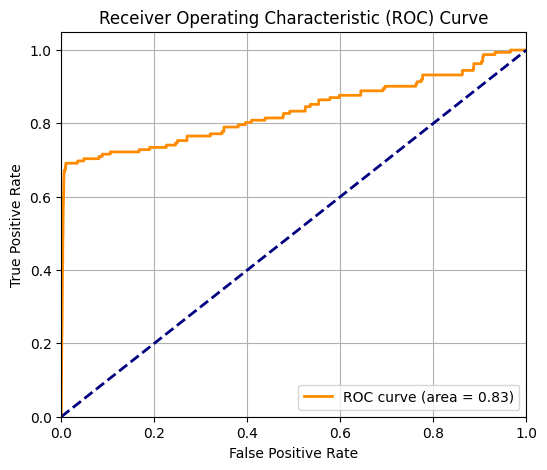

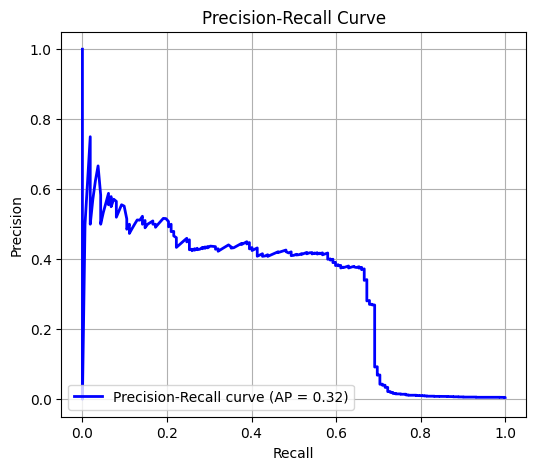

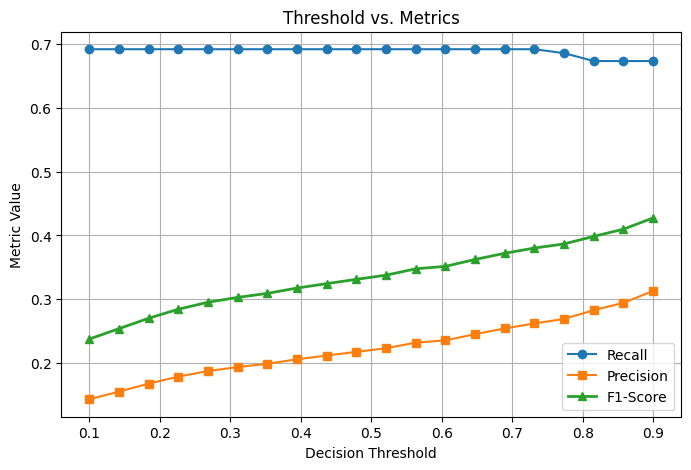

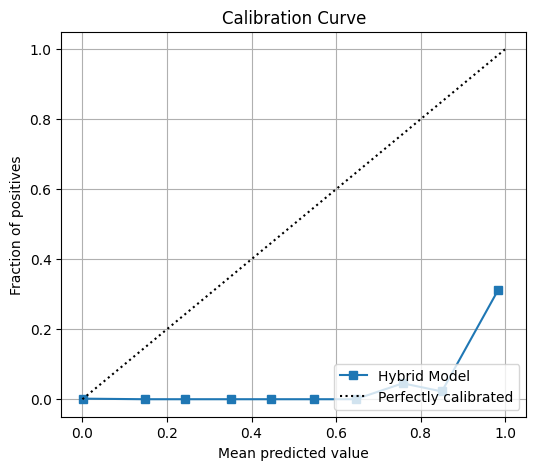

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


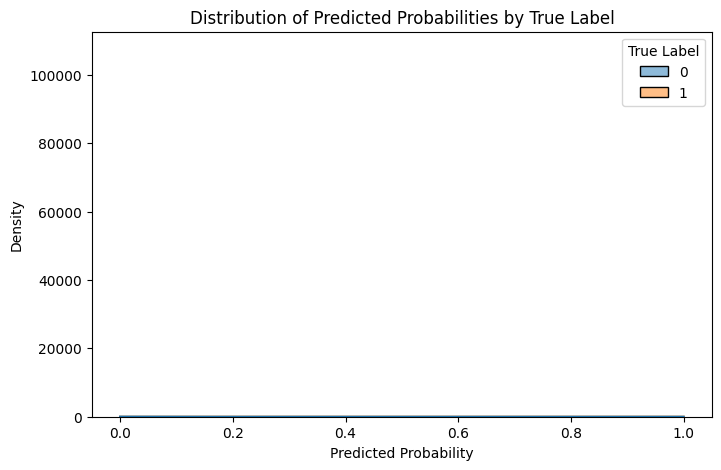

/tmp/ipython-input-658049587.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=decile_labels, y=lift_deciles, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYL

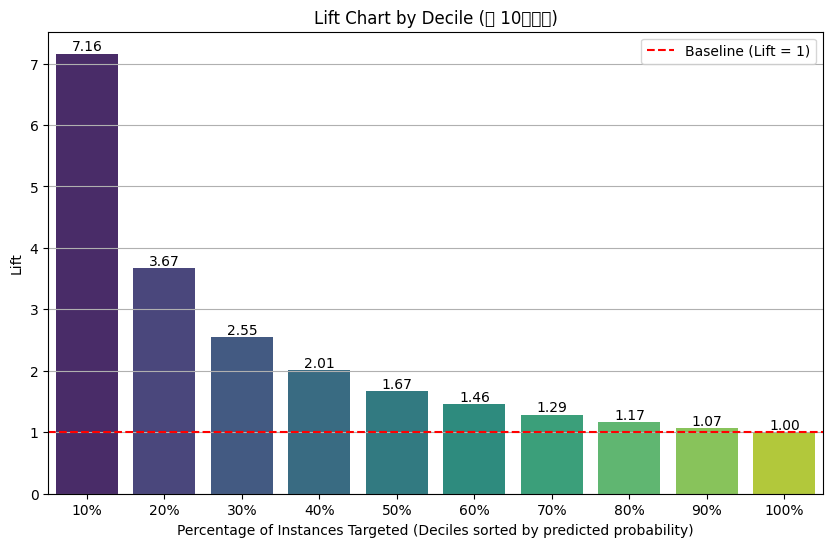

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    precision_score, recall_score, f1_score  # 추가
)
from sklearn.calibration import calibration_curve
import platform

# ==============================================================================
# 📊 한글 폰트 설정 (깨짐 방지)
# ==============================================================================
# 영문으로 변경함에 따라 한글 폰트 설정 로직은 제거합니다.
# 마이너스 부호 설정은 유지합니다.
try:
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ Using English labels for plots. Korean font setup is skipped.")
except Exception as e:
    print(f"🚨 Error setting plot configurations: {e}")
# ==============================================================================


# === 중요 ===
# 이 스크립트를 실행하기 전에,
# 첫 번째 스크립트가 실행되어 전역 변수에 'y_val'과 'y_prob'가 정의되어 있어야 합니다.
# (첫 번째 스크립트의 if __name__ == "__main__": 블록이 실행되어야 함)

print("\n" + "="*50)
print(" 📊 Model Performance Visualization (ROC, PR, Thresholds, Calibration, Distribution, Lift Chart) ") # 수정
print("="*50)

try:
    # 1. AUROC Curve (수신기 조작 특성 곡선)
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # 2. PR Curve (정밀도-재현율 곡선)
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    average_precision = average_precision_score(y_val, y_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    # 3. Threshold vs. Metrics (추가)
    thresholds = np.linspace(0.1, 0.9, 20)
    recalls, precisions, f1s = [], [], []

    for th in thresholds:
        pred = (y_prob >= th).astype(int)
        recalls.append(recall_score(y_val, pred, zero_division=0))
        precisions.append(precision_score(y_val, pred, zero_division=0))
        f1s.append(f1_score(y_val, pred, zero_division=0))

    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='s')
    plt.plot(thresholds, f1s, label='F1-Score', marker='^', linewidth=2)
    plt.xlabel('Decision Threshold')
    plt.ylabel('Metric Value')
    plt.title('Threshold vs. Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()


    # 4. Calibration Curve (보정 곡선) - 번호 수정
    fraction_of_positives, mean_predicted_value = calibration_curve(y_val, y_prob, n_bins=10)

    plt.figure(figsize=(6, 5))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Hybrid Model")
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    plt.xlabel("Mean predicted value") # 수정: 영문
    plt.ylabel("Fraction of positives") # 수정: 영문
    plt.title("Calibration Curve") # 수정: 영문
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # 5. Distribution of Predicted Probabilities (예측 확률 분포) - 번호 수정
    plot_df = pd.DataFrame({
        'Predicted Probability': y_prob,
        'True Label': y_val
    })

    plt.figure(figsize=(8, 5))
    sns.histplot(data=plot_df, x='Predicted Probability', hue='True Label', kde=True, stat='density', common_norm=False)
    plt.title('Distribution of Predicted Probabilities by True Label')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.show()

    # 6. Lift Chart (리프트 차트) - 번호 수정
    lift_df = pd.DataFrame({'true': y_val, 'prob': y_prob})
    lift_df = lift_df.sort_values(by='prob', ascending=False).reset_index(drop=True)

    lift_df['cumulative_true'] = lift_df['true'].cumsum()
    lift_df['cumulative_instances'] = lift_df.index + 1
    lift_df['percent_instances'] = lift_df['cumulative_instances'] / len(lift_df)

    total_positives = lift_df['true'].sum()
    lift_df['percent_true'] = lift_df['cumulative_true'] / total_positives if total_positives > 0 else 0

    baseline_positive_rate = total_positives / len(lift_df) if len(lift_df) > 0 else 0
    lift_df['lift'] = lift_df['percent_true'] / lift_df['percent_instances'] if baseline_positive_rate > 0 else 0

    # 10분위수(deciles) 계산
    lift_deciles = []
    decile_labels = []
    for i in range(1, 11):
        threshold_percent = i * 0.1
        # 정확히 10% 지점의 데이터를 가져오도록 수정
        decile_data = lift_df.iloc[:int(len(lift_df) * threshold_percent)]

        if not decile_data.empty:
            # 해당 10분위수 그룹의 평균 lift 계산
            # (해당 그룹의 실제 양성 비율) / (전체 데이터의 양성 비율)
            group_positive_rate = decile_data['true'].mean()
            decile_lift = group_positive_rate / baseline_positive_rate if baseline_positive_rate > 0 else 0
            lift_deciles.append(decile_lift)
        else:
            lift_deciles.append(0) # 데이터가 없는 경우

        decile_labels.append(f'{i*10}%')

    # 리프트 차트 시각화 (누적이 아닌 각 분위수별)
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=decile_labels, y=lift_deciles, palette='viridis')
    plt.axhline(1, color='red', linestyle='--', label='Baseline (Lift = 1)') # Baseline lift is 1
    plt.xlabel('Percentage of Instances Targeted (Deciles sorted by predicted probability)')
    plt.ylabel('Lift')
    plt.title('Lift Chart by Decile (각 10분위수)')
    plt.legend()
    plt.grid(axis='y')

    # Add lift values on top of bars
    for bar in bars.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()

except NameError as e:
    print(f"Error: {e}") # 수정: 영문
    print("Variables 'y_val' or 'y_prob' were not found from the previous script.") # 수정: 영문
    print("Please run the first script (training code) first.") # 수정: 영문
except Exception as e:
    print(f"An unknown error occurred during visualization: {e}") # 수정: 영문